# sc vs snRNA-seq Comparison 

## Sid Gurajala

## 08/11/2022

In [7]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(tidyr)
library(viridis)
library(stringr)
library(pheatmap)
library(presto)
library(pals)

Warning message:
“package ‘Seurat’ was built under R version 4.1.3”
Attaching SeuratObject

Attaching sp

Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Loading required package: viridisLite

Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.3”
Loading required package: data.table

Warning message:
“package ‘data.table’ was built under R version 4.1.1”

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, t

In [1]:
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 300)
}

In [2]:
plot_shuffled_features <- function(ab, umap, exprs, pct = 0.95) {
    library(viridis)
    max.cutoff = quantile(exprs[ab,], pct)
    min.cutoff = quantile(exprs[ab,], 1-pct)
    
    tmp <- sapply(X = exprs[ab,], FUN = function(x) {
        return(ifelse(test = x > max.cutoff, yes = max.cutoff,
            no = x))
    })
    tmp <- sapply(X = tmp, FUN = function(x) {
        return(ifelse(test = x < min.cutoff, yes = min.cutoff,
            no = x))
    })
    umap_res_plot <- cbind(umap, tmp)
    return(ggplot(data = as.data.frame(umap_res_plot)[sample(nrow(umap_res_plot)),] , aes(x = V1, y = V2)) +
      geom_point(mapping = aes(color = tmp), shape = ".") +
      scale_color_viridis(option = "plasma", end = .9) +
      theme_classic() +
      theme(axis.text = element_blank(), axis.title = element_blank(), plot.title = element_text(size = 30), legend.position = "none") +
      labs(title = ab, color = "Normalized Expression"))
}

In [3]:
all_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/meta_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [4]:
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [5]:
umap <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/umap_harmony_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-20pcs-ReQC-8-10-22.rds')$embedding

## nGenes, nUMIs Across Cell Types and Samples

In [9]:
fig.size(5,10)
ggplot(all_meta, aes(x = nCount_RNA, fill = dataset)) +
    geom_bar(aes(y = ..count.. / sum(..count..))) +
    facet_wrap(~dataset) +
    theme_classic() + 
    theme(axis.text = element_text(size = 10), panel.spacing = unit(2, "lines"), axis.title = element_text(size = 10), plot.title = element_text(size = 20)) +
    labs(x = 'nUMIs per cell', title = '# of UMIs per Cell Across Datasets') 

ggplot(all_meta, aes(x = nFeature_RNA, y = ..density.., fill = dataset)) +
    geom_density() + 
    facet_wrap(~dataset) + 
    theme_classic() + 
    theme(axis.text = element_text(size = 10), panel.spacing = unit(2, "lines"), axis.title = element_text(size = 10), plot.title = element_text(size = 20)) +
    labs(x = 'nGenes per cell', title = '# of Genes Detected per Cell Across Datasets') 

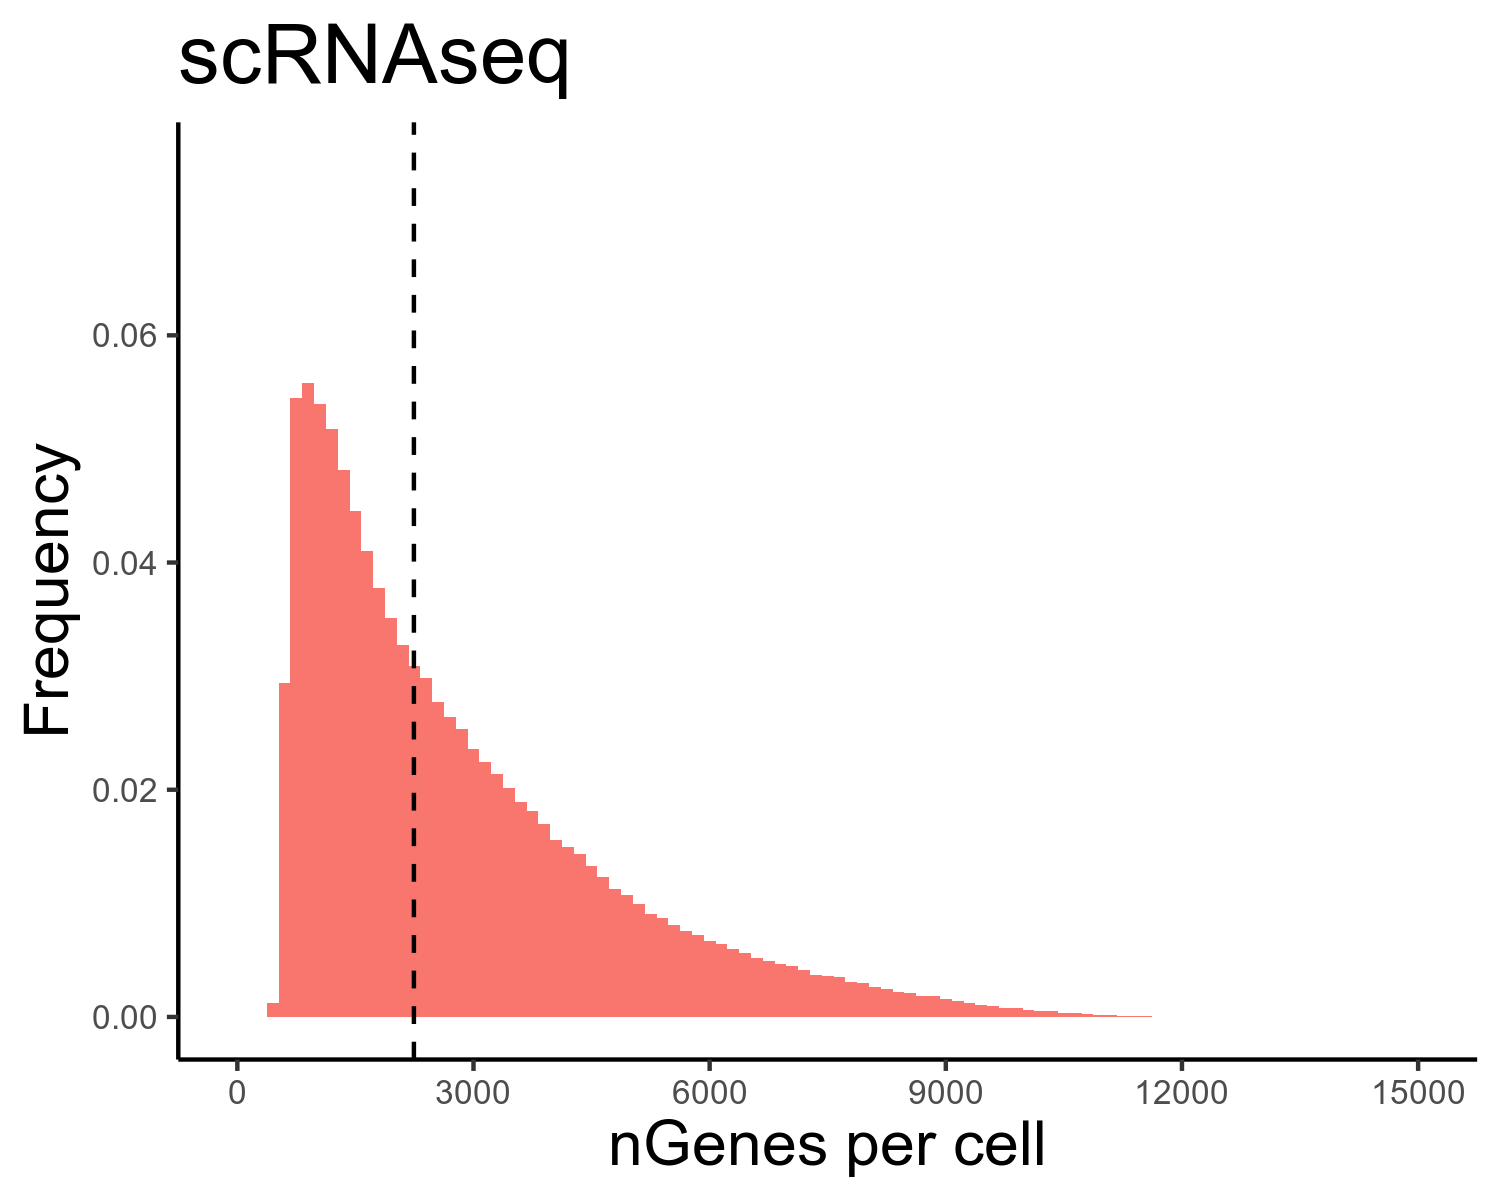

In [143]:
 fig.size(4, 5)
df <- all_meta %>% filter(dataset == 'scRNAseq')
ggplot(df, aes(x = nFeature_RNA)) +
    geom_histogram(aes(y = after_stat(density * width)), fill = '#F8766D', binwidth = 150) +
    theme_classic() + 
    geom_vline(xintercept = median(df$nFeature_RNA), linetype = 'dashed') + 
    scale_x_continuous(breaks = seq(0, 15000, 3000)) +
    coord_cartesian(xlim=c(0,15000), ylim = c(0, 0.075)) + 
    theme(axis.text = element_text(size = 8), panel.spacing = unit(2, "lines"), axis.title = element_text(size = 15), plot.title = element_text(size = 20)) +
    labs(x = 'nGenes per cell', y = 'Frequency', title = 'scRNAseq') 

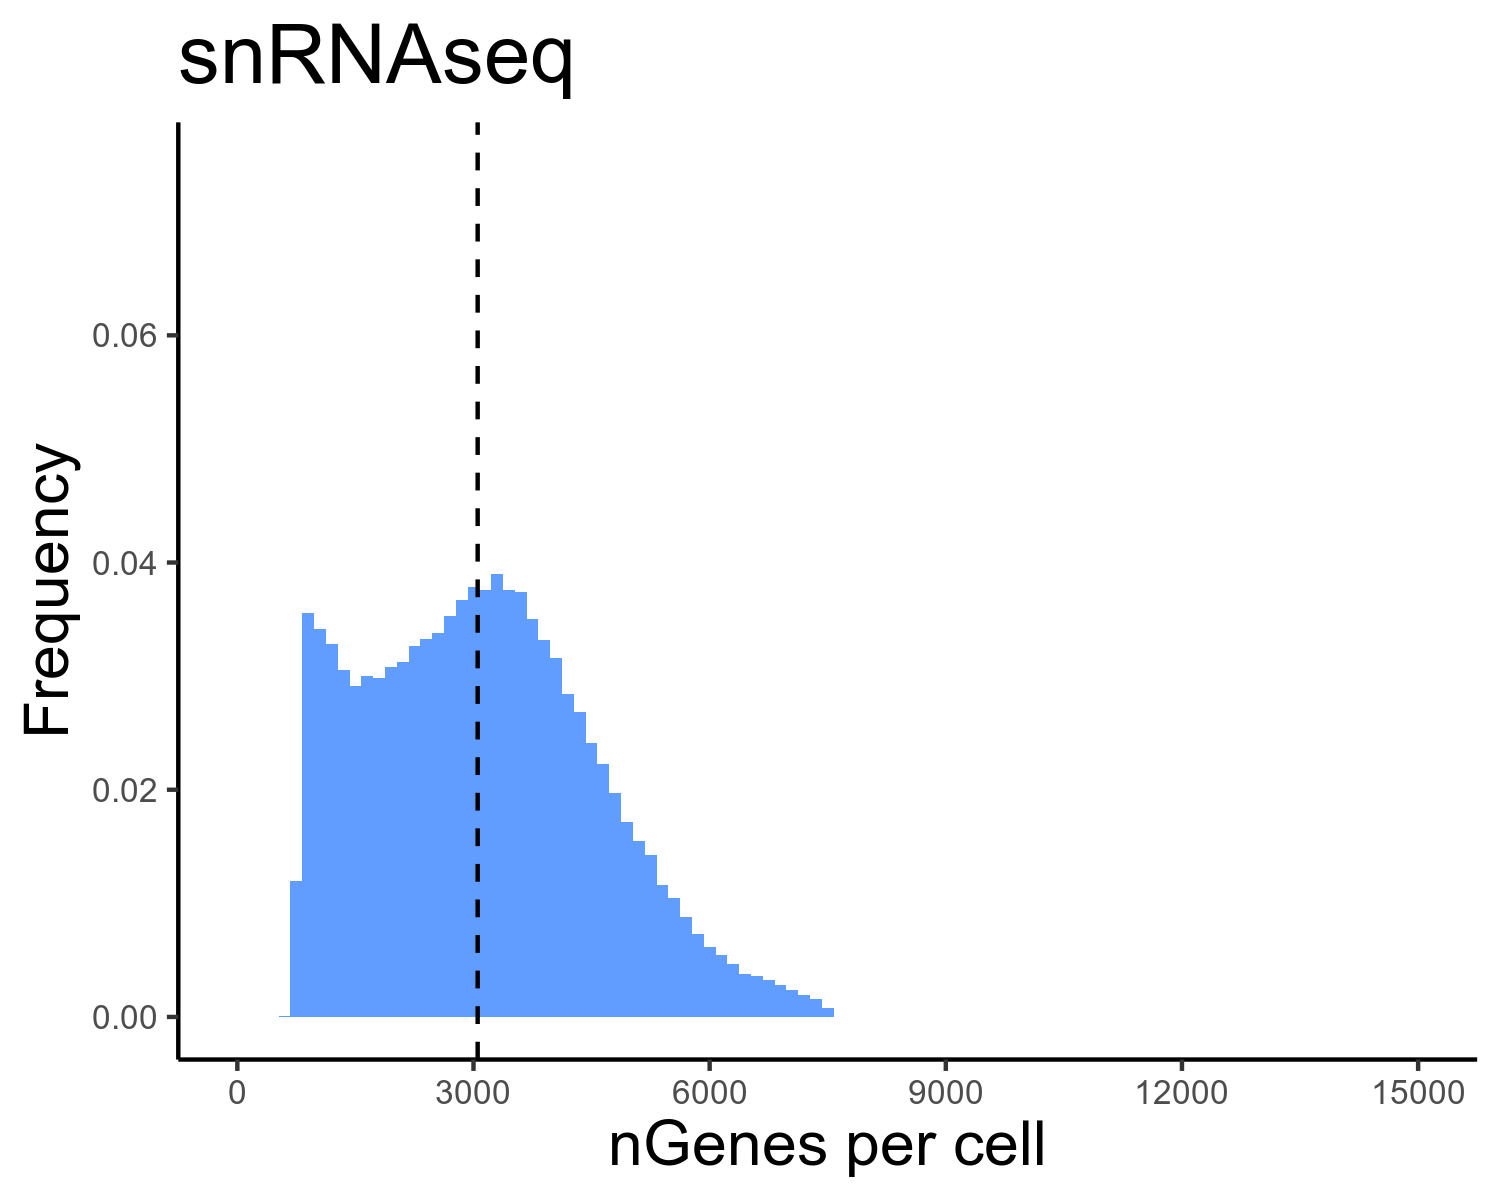

In [144]:
fig.size(4,5)
df <- all_meta %>% filter(dataset == 'snRNAseq')
ggplot(df, aes(x = nFeature_RNA)) +
    geom_histogram(aes(y = after_stat(density * width)), fill = '#619CFF', binwidth = 150) +
    theme_classic() + 
    geom_vline(xintercept = median(df$nFeature_RNA), linetype = 'dashed') +
    scale_x_continuous(breaks = seq(0, 15000, 3000)) +
    coord_cartesian(xlim=c(0, 15000), ylim = c(0, 0.075)) + 
    theme(axis.text = element_text(size = 8), panel.spacing = unit(2, "lines"), axis.title = element_text(size = 15), plot.title = element_text(size = 20)) +
    labs(x = 'nGenes per cell', y = 'Frequency', title = 'snRNAseq') 

In [ ]:
quantile(all_meta %>% filter(dataset == 'scRNAseq') %>% pull(nCount_RNA))

In [ ]:
quantile(all_meta %>% filter(dataset == 'snRNAseq') %>% pull(nCount_RNA))

In [ ]:
quantile(all_meta %>% filter(dataset == 'scRNAseq') %>% pull(nFeature_RNA))

In [ ]:
quantile(all_meta %>% filter(dataset == 'snRNAseq') %>% pull(nFeature_RNA))

In [ ]:
all_meta <- all_meta %>%  mutate(individual = str_split(sample, '_')) %>% 
                            rowwise() %>% 
                            mutate(individual = unlist(individual)[3])

In [ ]:
genes_detected <- all_meta %>% group_by(broad.type, dataset) %>% 
                    select(broad.type, nFeature_RNA, dataset) %>% 
                    summarize(nGenes = mean(nFeature_RNA)) %>% 
                    pivot_wider(names_from = 'dataset', values_from = nGenes)
reads_detected <- all_meta %>% group_by(broad.type, dataset) %>% 
                    select(broad.type, nCount_RNA, dataset) %>% 
                    summarize(nUMIs = mean(nCount_RNA)) %>% 
                    pivot_wider(names_from = 'dataset', values_from = nUMIs)

In [ ]:
ggplot(genes_detected, aes(x = scRNAseq, y = snRNAseq, color = broad.type)) +
    geom_point(size = 3) + 
    theme_classic() + 
    geom_abline() + 
    scale_x_continuous(limits = c(1000, 4000)) + 
    scale_y_continuous(limits = c(1000, 4000)) + 
    labs(x = 'Mean nGenes scRNA-seq', y = 'Mean nGenes snRNA-seq', title = 'r = 0.672') + 
    theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20), plot.title = element_text(size = 25)) +
    scale_color_manual(values = as.vector(alphabet2(26)), drop = FALSE) +
    guides(colour = guide_legend(override.aes = list(size=4), title="Broad Cell Type")) 

ggplot(reads_detected, aes(x = scRNAseq, y = snRNAseq, color = broad.type)) +
    geom_point(size = 3) + 
    theme_classic() + 
    geom_abline() + 
    scale_x_continuous(limits = c(0, 20000)) + 
    scale_y_continuous(limits = c(0, 20000)) + 
    labs(x = 'Mean nUMI scRNA-seq', y = 'Mean nUMI snRNA-seq', title = 'r = 0.359') + 
    theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20), plot.title = element_text(size = 25)) +
    scale_color_manual(values = as.vector(alphabet2(26)), drop = FALSE) +
    guides(colour = guide_legend(override.aes = list(size=4), title="Broad Cell Type"))

In [ ]:
overlapping_genes  <- all_meta %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) %>% 
                group_by(dataset, individual, broad.type) %>% 
                select(dataset, individual, broad.type, nFeature_RNA) %>% 
                summarize(count = mean(nFeature_RNA)) %>% 
                pivot_wider(names_from = 'dataset', values_from = 'count') %>% na.omit()
overlapping_norm  <- all_meta %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) %>% 
                group_by(dataset, individual, broad.type) %>% 
                select(dataset, individual, broad.type, nFeature_RNA, nCount_RNA) %>% 
                summarize(count = mean(nFeature_RNA /nCount_RNA)) %>% 
                pivot_wider(names_from = 'dataset', values_from = 'count') %>% na.omit()

In [ ]:
all_meta %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) %>% 
                group_by(dataset, individual, broad.type) %>% 
                tally() %>% na.omit()  %>% filter(dataset == 'snRNAseq', broad.type %in% c('T/NK', 'B/Plasma', 'Myeloid')) %>%
                pivot_wider(names_from = 'broad.type', values_from = 'n')

In [ ]:
PC <- overlapping_norm %>% filter(broad.type == 'PC/DCT/CNT')

In [ ]:
cor(PC$scRNAseq, PC$snRNAseq)

In [ ]:
fig.size = c(12, 10) 
ggplot(overlapping_norm %>% filter(broad.type == 'PC/DCT/CNT'), aes(x = scRNAseq, y = snRNAseq)) +
    geom_point(size = 3) + 
    theme_classic() + 
    geom_abline() + 
    scale_x_continuous(limits = c(0, 0.8)) + 
    scale_y_continuous(limits = c(0, 0.8)) + 
    labs(x = 'Mean nGenes/nUMIs scRNA-seq', y = 'Mean nGenes/nUMIs snRNA-seq', title = 'PC/DCT/CNT') + 
    theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20, face = 'bold'), 
          plot.title = element_text(size = 30, face = 'bold')) 

## Marker Gene Expression

In [ ]:
EC <- c("CLDN5", "SERPINE2", "C10orf10", "FN1",
            "IGF2","LTBP4", "PODXL", "SLC14A1", "PPP1R14A",
            "NPDC1", "EMCN", "CRHBP", "PLAT", "RAMP2", "SOST",
          "FCN3", "EGFL7", "PTPRB", "ENG", "EHD3", "RNASE1", "SDPR", "RAMP3", "DNASE1L3", "PLVAP",
          "ENG", "EGFL7", "RGCC", "TMEM88", "RAMP2", "CTGF", "CFH", "TNNT2", "VCAM1", "BGN", "CYP1B1", "PTGDS", "SPOCK2", "SLPI", "MMP7")

IC <- c("KRT7", "SLC4A9", "ATP6V1G3", "CTB-27N1.1", "TSPAN8",
         "SLC26A4", "ATP6V0D2", "HEPACAM2", "CDA", "IL18","SPINK1", "ATP6V0D2", "ATP6V1G3", "SMRT2", "CTB-27N1.1",
         "FAM24B", "RHCG", "SMIM6","CTB-27N1.1", "DMRT", "SPINK1", "ATP6V0D2", "ATP6V1G3", "SMRT2", "CTB-27N1.1",
          "SLC26A7", "FAM24B", "SLC8A1", "KLK1", "STC1")

PC_DCT_CNT <- c("SLC12A3", "EGF", "SERPINA5", "DUSP9", "WNK4", "PVALB",
         "SFRP1", "RHCG",  "KLK1", "SLC8A1", "RHCG", "PVALB", "SERPINA5", "TMEM178A", "TEX41",
         "ADM", "TMPRSS2", "HMGCS2", "FXYD4", "AQP2", "STC1", "PTGER1", "GDF15", "ST7GAL1", "SMIM22",
        "GATA3", "SCNN1G", "CALB1", "STC1", "HMGCS2", "SLC8A1", "SCNN1B", "SCNN1G", "GATA3-AS1", "RHCG", "TMEM178A", 
           "PTGER1", "MMP7")

ATL_TAL <- c("SLC12A1", "SFRP1", "CLDN16", "EGF", "PPP1R1A", "DUSP9", "CXCL12",
         "CTD-2228K2.5", "MFSD4", "PLAU", "SLPI", "MMP7", "KRT7", "CLDN3", "PAPPA2", "TSPAN8", "S100A14", "FIBIN", "CLDN16")

FIB <- c("DCN","COL1A2", "LUM", "APOD", "COL1A1",
           "CCDC80","FBLN1", "MFAP5", "IDFBP6", "CFD")

POD <- c("PTGDS", "PODXL","HTRA1", "NPHS2", "DCN",
         "TPPP3", "FGF1", "NPNT", "SPOCK2", "CTGF")

ECAEA <-  c("CLDN5", "SERPINE2", "C10orf10", "FN1",
            "IGF2","LTBP4", "PODXL", "SLC14A1", "PPP1R14A",
            "NPDC1")

ECGC <- c("EMCN", "CRHBP", "PLAT", "RAMP2", "SOST",
          "FCN3", "EGFL7", "PTPRB", "ENG", "EHD3")

ECPT <- c("RNASE1", "SDPR", "RAMP3", "DNASE1L3", "PLVAP",
          "ENG", "EGFL7", "RGCC", "TMEM88", "RAMP2")

VSMC <- c("TAGLN", "RGS5", "MYL9", "ACTA2", "TPM2", 
          "C11orf96", "MYH11", "PLN", "RERGL", "SPARCL1")

PT1 <- c("MT1HL1", "SLC22A12", "RP11-119D9.1", "C9orf66",
         "PIPOX", "DAO", "RNF186", "MT1A","HAAO","AFP", "SLC13A3", "SLC6A19", "FMO1", "PLG", "SLC34A1", 
         "C14orf164", "ACP5", "SLC27A2", "ENPEP", "CALML3")

ICB <- c("KRT7", "SLC4A9", "ATP6V1G3", "CTB-27N1.1", "TSPAN8",
         "SLC26A4", "ATP6V0D2", "HEPACAM2", "CDA", "IL18")

ICA <- c("SPINK1", "ATP6V1G3", "ATP6V0D2", "SLC26A7", "TMEM101",
         "FAM24B", "RHCG", "SMIM6","CTB-27N1.1", "DMRT")

PCIC <- c("SPINK1", "ATP6V0D2", "ATP6V1G3", "SMRT2", "CTB-27N1.1",
          "SLC26A7", "FAM24B", "SLC8A1", "KLK1", "STC1")

TAL <- c("SLC12A1", "SFRP1", "CLDN16", "EGF", "PPP1R1A", "DUSP9", "CXCL12",
         "CTD-2228K2.5", "MFSD4", "PLAU")

DCT <- c("SLC12A3", "EGF", "SERPINA5", "DUSP9", "WNK4", "PVALB",
         "SFRP1", "RHCG")

CNT <- c("KLK1", "SLC8A1", "RHCG", "PVALB", "SERPINA5", "TMEM178A", "TEX41",
         "ADM", "TMPRSS2", "HMGCS2")

PC <- c("FXYD4", "AQP2", "STC1", "PTGER1", "GDF15", "ST7GAL1", "SMIM22",
        "GATA3", "SCNN1G", "CALB1")

PCCNT <- c("STC1", "HMGCS2", "SLC8A1", "SCNN1B", "SCNN1G", "GATA3-AS1", "RHCG", "TMEM178A", 
           "PTGER1", "MMP7")

ATL <- c("SLPI", "MMP7", "KRT7", "CLDN3", "PAPPA2", "TSPAN8", "S100A14", "FIBIN", "CLDN16")

PEC <- c("CTGF", "CFH", "TNNT2", "VCAM1", "BGN", "CYP1B1", "PTGDS", "SPOCK2", "SLPI", "MMP7")

DTL <- c("VCAM1", "CLDN3", "C1orf186","ITGB8", "PRUNE2","PROM1", "MDK", "MMP7", "KRT7", "RASSF4")

MYL <- c("LST1","TYROBP", "AIF1", "FCER1G", "LYZ", "S100A9", "S100A8", "FCN1", "FCGR3A",
         "RGS1","HLA-DQA1", "LYZ", "C1QA", "C1QB", "MS4A6A", "AIF1", "C1QC", "FCER1A", "FCER1G")

B <- c("CD79A", "MS4A1", "IGJ", "CD79B", "VPREB3", "IRF8", "SELL", "GPR183", "BIRC3","PLAC8", "MXZB1", "IGHG1", "IGJ", "MZB1", "XBP1")

T <- c("CCL5","CCL4", "NKG7", "GZMA", "GZMH", "CST7", "GZMK", "CD7", "CTSW", "RGS1", "IL7R", "CD3E",
       "CD3G", "CD40LG", "LCK", "IL2RG", "TRAF3IP3", "IL7R", "CD2", "CD3E", "CD40LG", "GPR171",
       "CD3G", "AC092580.4", "IL2RG", "IL2", "RGS1", "GNLY", "NKG7", "CCL4", "GZMB", "CCL3", "PRF1", "CST7", "CSW","KLRD1", "GZMA")

### Broad Cell Type Aggregate

In [ ]:
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [ ]:
sn_T <- norm[rownames(norm) %in% T, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'T/NK') %>% pull(cell)]
sc_T <- norm[rownames(norm) %in% T, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'T/NK') %>% pull(cell)]
sn_T_means <- rowMeans(sn_T)
sc_T_means <- rowMeans(sc_T)

T_NK <- data.frame('sn' = sn_T_means,
                  'sc' = sc_T_means, 
                  'cell.type' = 'T/NK')

sn_B <- norm[rownames(norm) %in% B, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'B/Plasma') %>% pull(cell)]
sc_B <- norm[rownames(norm) %in% B, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'B/Plasma') %>% pull(cell)]
sn_B_means <- rowMeans(sn_B)
sc_B_means <- rowMeans(sc_B)


B_Plasma <- data.frame('sn' = sn_B_means,
                  'sc' = sc_B_means, 
                  'cell.type' = 'B/Plasma')

sn_Myeloid <- norm[rownames(norm) %in% MYL, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'Myeloid') %>% pull(cell)]
sc_Myeloid <- norm[rownames(norm) %in% MYL, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'Myeloid') %>% pull(cell)]
sn_Myeloid_means <- rowMeans(sn_Myeloid)
sc_Myeloid_means <- rowMeans(sc_Myeloid)


Myeloid <- data.frame('sn' = sn_Myeloid_means,
                  'sc' = sc_Myeloid_means, 
                  'cell.type' = 'Myeloid')

In [ ]:
sn_PT <- norm[rownames(norm) %in% PT1, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'PT') %>% pull(cell)]
sc_PT <- norm[rownames(norm) %in% PT1, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'PT') %>% pull(cell)]
sn_PT_means <- rowMeans(sn_PT)
sc_PT_means <- rowMeans(sc_PT)
PT <- data.frame('sn' = sn_PT_means,
                  'sc' = sc_PT_means, 
                  'cell.type' = 'PT')

In [ ]:
sn_Pod <- norm[rownames(norm) %in% POD, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'Podocyte') %>% pull(cell)]
sc_Pod <- norm[rownames(norm) %in% POD, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'Podocyte') %>% pull(cell)]
sn_Pod_means <- rowMeans(sn_Pod)
sc_Pod_means <- rowMeans(sc_Pod)
Pod <- data.frame('sn' = sn_Pod_means,
                  'sc' = sc_Pod_means, 
                  'cell.type' = 'Podocyte')

In [ ]:
sn_Fib <- norm[rownames(norm) %in% FIB, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'Fib/Fib-like') %>% pull(cell)]
sc_Fib <- norm[rownames(norm) %in% FIB, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'Fib/Fib-like') %>% pull(cell)]
sn_Fib_means <- rowMeans(sn_Fib)
sc_Fib_means <- rowMeans(sc_Fib)
Fib <- data.frame('sn' = sn_Fib_means,
                  'sc' = sc_Fib_means, 
                  'cell.type' = 'Fib/Fib-like')

In [ ]:
sn_EC <- norm[rownames(norm) %in% EC, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'EC') %>% pull(cell)]
sc_EC <- norm[rownames(norm) %in% EC, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'EC') %>% pull(cell)]
sn_EC_means <- rowMeans(sn_EC)
sc_EC_means <- rowMeans(sc_EC)
EC <- data.frame('sn' = sn_EC_means,
                 'sc' = sc_EC_means, 
                 'cell.type' = 'EC')

In [ ]:
sn_IC <- norm[rownames(norm) %in% IC, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'IC') %>% pull(cell)]
sc_IC <- norm[rownames(norm) %in% IC, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'IC') %>% pull(cell)]
sn_IC_means <- rowMeans(sn_IC)
sc_IC_means <- rowMeans(sc_IC)
IC <- data.frame('sn' = sn_IC_means,
                 'sc' = sc_IC_means, 
                 'cell.type' = 'IC')

In [ ]:
sn_PC_DCT_CNT <- norm[rownames(norm) %in% PC_DCT_CNT, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'PC/DCT/CNT') %>% pull(cell)]
sc_PC_DCT_CNT <- norm[rownames(norm) %in% PC_DCT_CNT, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'PC/DCT/CNT') %>% pull(cell)]
sn_PC_DCT_CNT_means <- rowMeans(sn_PC_DCT_CNT)
sc_PC_DCT_CNT_means <- rowMeans(sc_PC_DCT_CNT)
PC_DCT_CNT <- data.frame('sn' = sn_PC_DCT_CNT_means,
                         'sc' = sc_PC_DCT_CNT_means, 
                         'cell.type' = 'PC/DCT/CNT')

In [ ]:
sn_ATL_TAL <- norm[rownames(norm) %in% ATL_TAL, all_meta %>% filter(dataset == 'snRNAseq', broad.type == 'TAL/ATL') %>% pull(cell)]
sc_ATL_TAL <- norm[rownames(norm) %in% ATL_TAL, all_meta %>% filter(dataset == 'scRNAseq', broad.type == 'TAL/ATL') %>% pull(cell)]
sn_ATL_TAL_means <- rowMeans(sn_ATL_TAL)
sc_ATL_TAL_means <- rowMeans(sc_ATL_TAL)
TAL_ATL <- data.frame('sn' = sn_ATL_TAL_means,
                      'sc' = sc_ATL_TAL_means, 
                      'cell.type' = 'TAL/ATL')

In [ ]:
norm_markers <- rbind(T_NK, B_Plasma, Myeloid, PT, Pod, Fib, EC, IC, PC_DCT_CNT, TAL_ATL) %>% 
mutate(sn = as.numeric(sn), sc = as.numeric(sc)) %>% na.omit()

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 5)
ggplot(norm_markers, aes(x = sc, y = sn, color = cell.type)) +
    geom_point() + 
    theme_classic() + 
    labs(x = 'Mean scRNAseq Expression', y = 'Mean snRNAseq Expression', title = 'Marker Gene Expression in Relevant Cell Type') + 
    geom_abline() + 
    theme(axis.text = element_text(size = 10), axis.title = element_text(size = 10, face = 'bold'), 
    plot.title = element_text(size = 12, face = 'bold')) 

## Per Sample Per Cell Type Aggregate

In [ ]:
all_meta <- all_meta %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3])

In [ ]:
T_ind_extract <- all_meta %>% group_by(individual, dataset, broad.type) %>% tally() %>% 
                filter(broad.type == 'T/NK', n > 10) %>% filter(dataset == 'snRNAseq') %>% pull(individual) %>% unique()

In [ ]:
T <- c("CCL5","CCL4", "NKG7", "GZMA", "GZMH", "CST7", "GZMK", "CD7", "CTSW", "RGS1", "IL7R", "CD3E",
       "CD3G", "CD40LG", "LCK", "IL2RG", "TRAF3IP3", "IL7R", "CD2", "CD3E", "CD40LG", "GPR171",
       "CD3G", "AC092580.4", "IL2RG", "IL2", "RGS1", "GNLY", "NKG7", "CCL4", "GZMB", "CCL3", "PRF1", "CST7", "CSW","KLRD1", "GZMA")

In [ ]:
T_meta <- cbind(all_meta, norm[rownames(norm) %in% T, ] %>% data.frame() %>% t()) %>% filter(broad.type == 'T/NK')

In [ ]:
T_pseudo <- T_meta %>% 
            group_by(individual, dataset) %>% 
            filter(individual %in% T_ind_extract) %>% 
            summarize(LCK = mean(LCK), CD2 = mean(CD2), RGS1 = mean(RGS1),  GNLY = mean(GNLY), IL2 = mean(IL2), 
                      IL7R = mean(IL7R), GZMK = mean(GZMK), GZMA = mean(GZMA), 
                      PRF1 = mean(PRF1), CD3E = mean(CD3E), CD3G = mean(CD3G), GZMB = mean(GZMB), 
                      CCL5 = mean(CCL5), CCL3 = mean(CCL3), CCL4 = mean(CCL4), CD40LG = mean(CD40LG))%>% na.omit() %>% 
            pivot_longer(cols = c('LCK', 'CD2', 'RGS1', 'GNLY', 'IL2', 'IL7R', 'GZMK', 
                          'GZMA', 'PRF1', 'CD3E', 'CD3G', 'GZMB', 'CCL5', 'CCL3', 'CCL4', 'CD40LG')) %>% 
            pivot_wider(names_from = 'dataset', values_from = 'value') %>% na.omit() 

In [ ]:
ggplot(T_pseudo, aes(x = scRNAseq, y = snRNAseq, color = name)) + 
    geom_point() + 
    theme_classic() + 
    geom_abline()

In [ ]:
B_ind_extract <- all_meta %>% group_by(individual, dataset, broad.type) %>% tally() %>% 
                filter(broad.type == 'B/Plasma', n > 10) %>% filter(dataset == 'snRNAseq') %>% pull(individual) %>% unique()

In [ ]:
B <- c("CD79A", "MS4A1", "IGJ", "CD79B", "VPREB3", "IRF8", "SELL", "GPR183", "BIRC3","PLAC8", "MXZB1", "IGHG1", "IGJ", "MZB1", "XBP1")

In [ ]:
B_meta <- cbind(all_meta, norm[rownames(norm) %in% B, ] %>% data.frame() %>% t()) %>% filter(broad.type == 'B/Plasma')

In [ ]:
B_pseudo <- B_meta %>% 
            group_by(individual, dataset) %>% 
            filter(individual %in% B_ind_extract) %>% 
            summarize(CD79A = mean(CD79A), MS4A1 = mean(MS4A1), IGJ = mean(IGJ),  GNLY = mean(GNLY), IL2 = mean(IL2), 
                      IL7R = mean(IL7R), GZMK = mean(GZMK), GZMA = mean(GZMA), 
                      PRF1 = mean(PRF1), CD3E = mean(CD3E), CD3G = mean(CD3G), GZMB = mean(GZMB), 
                      CCL5 = mean(CCL5), CCL3 = mean(CCL3), CCL4 = mean(CCL4), CD40LG = mean(CD40LG))%>% na.omit() %>% 
            pivot_longer(cols = c('LCK', 'CD2', 'RGS1', 'GNLY', 'IL2', 'IL7R', 'GZMK', 
                          'GZMA', 'PRF1', 'CD3E', 'CD3G', 'GZMB', 'CCL5', 'CCL3', 'CCL4', 'CD40LG')) %>% 
            pivot_wider(names_from = 'dataset', values_from = 'value') %>% na.omit() 

## DEG sc vs snRNA-seq

In [38]:
sn_meta <- all_meta %>% filter(dataset == 'snRNAseq') 
sc_meta <- all_meta %>% filter(dataset == 'scRNAseq')

In [ ]:
sn_norm <- norm[, sn_meta$cell]
sc_norm <- norm[, sc_meta$cell]

ERROR: Error in subCsp_cols(x, j, drop = drop): Cholmod error 'out of memory' at file ../Core/cholmod_memory.c, line 146


In [ ]:
sn_wilcox <- wilcoxauc(norm[, sn_meta$cell], sn_meta$broad.type)

In [ ]:
write.csv(sn_wilcox, '/data/srlab/ssg34/SLE_kidney_v2/data/sn_wilcox_DEG.csv')

In [ ]:
sn_wilcox <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/sn_wilcox_DEG.csv') %>% select(-X)

In [39]:
idx <- c(sample(rownames(sc_meta %>% filter(broad.type == 'B/Plasma')), 861),
         sample(rownames(sc_meta %>% filter(broad.type == 'EC')), 5052),
         sample(rownames(sc_meta %>% filter(broad.type == 'Fib/Fib-like')), 2479), 
         sample(rownames(sc_meta %>% filter(broad.type == 'IC')), 7665),
         sample(rownames(sc_meta %>% filter(broad.type == 'Myeloid')), 1510),
         sample(rownames(sc_meta %>% filter(broad.type == 'PC/DCT/CNT')), 22542),
         sample(rownames(sc_meta %>% filter(broad.type == 'Podocyte')), 896),
         sample(rownames(sc_meta %>% filter(broad.type == 'PT')), 58366),
         sample(rownames(sc_meta %>% filter(broad.type == 'T/NK')), 2515),
         sample(rownames(sc_meta %>% filter(broad.type == 'TAL/ATL')), 44662))

In [ ]:
sc_wilcox <- wilcoxauc(norm[, idx], all_meta[idx, 'broad.type'])

In [ ]:
write.csv(sc_wilcox, '/data/srlab/ssg34/SLE_kidney_v2/data/sc_wilcox_DEG.csv')

In [ ]:
sc_wilcox <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/sc_wilcox_DEG.csv') %>% select(-X)

In [ ]:
all_wilcox <- wilcoxauc(norm, all_meta$broad.type)

In [ ]:
write.csv(all_wilcox, '/data/srlab/ssg34/SLE_kidney_v2/data/all_wilcox_DEG.csv')

In [ ]:
all_wilcox <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/all_wilcox_DEG.csv') %>% select(-X)

In [ ]:
all_best <-data.frame()
for (cell in c('B/Plasma', 'T/NK','Myeloid','Podocyte','PT','EC','IC','Fib/Fib-like','PC/DCT/CNT','TAL/ATL')) {
    best <- all_wilcox %>% filter(group == cell) %>% arrange(desc(logFC)) %>% 
            slice(1:5) %>% select(feature) %>% mutate(cell.type = cell)
    all_best <- rbind(all_best, best)
}

In [ ]:
sc_best <- sc_wilcox %>% filter(feature %in% all_best$feature) %>% 
            select(feature, group, logFC) %>% 
            mutate(logFC = as.numeric(logFC)) %>% 
            pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()
sn_best <- sn_wilcox %>% filter(feature %in% all_best$feature) %>% 
                select(feature, group, logFC) %>% 
                mutate(logFC = as.numeric(logFC)) %>% 
                pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()

In [ ]:
all_wilc <- all_wilcox %>% filter(feature %in% all_best$feature) %>% 
                select(feature, group, logFC) %>% 
                mutate(logFC = as.numeric(logFC)) %>% 
                pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()

In [ ]:
rownames(sc_best) <- sc_best[, 'feature']
sc_best <- sc_best[, - 1]
sc_best <- sc_best[match(all_best$feature, rownames(sc_best)), ] %>% as.matrix()
rownames(sn_best) <- sn_best[, 'feature']
sn_best <- sn_best[, - 1] 
sn_best <- sn_best[match(all_best$feature, rownames(sn_best)), ] %>% as.matrix()

In [ ]:
rownames(all_wilc) <- all_wilc[, 'feature']
all_wilc <- all_wilc[, - 1]
all_wilc <- all_wilc[match(all_best$feature, rownames(all_wilc)), ] %>% as.matrix()

In [ ]:
sc_best <- sc_best[! rownames(sc_best) %in% c('HLA-DRA','TMSB4X','DEFB1'), c('B.Plasma', 'T.NK', 'Myeloid',  'Podocyte', 'PT', 'EC', 'IC', 'Fib.Fib.like', 'PC.DCT.CNT', 'TAL.ATL')]
sn_best <- sn_best[! rownames(sn_best) %in% c('HLA-DRA','TMSB4X','DEFB1'), c('B.Plasma', 'T.NK', 'Myeloid', 'Podocyte', 'PT', 'EC', 'IC', 'Fib.Fib.like', 'PC.DCT.CNT', 'TAL.ATL')]

In [ ]:
all_wilc <- all_wilc[! rownames(all_wilc) %in% c('HLA-DRA','TMSB4X','DEFB1'), c('B.Plasma', 'T.NK', 'Myeloid', 'Podocyte', 'PT', 'EC', 'IC', 'Fib.Fib.like', 'PC.DCT.CNT', 'TAL.ATL')]

In [ ]:
annotate <- all_best %>% filter(! feature %in% c('HLA-DRA','TMSB4X','DEFB1')) %>% pull(cell.type) %>% data.frame()
rownames(annotate) <- all_best %>% filter(! feature %in% c('HLA-DRA','TMSB4X','DEFB1')) %>% pull(feature)
colnames(annotate) = 'Marker Cell Type'

In [ ]:
fig.size(5, 5)
pheatmap(sc_best, 
         fontsize = ,
         cluster_rows = F,
         cluster_cols = F,
         annotation_row = annotate,
         legend_breaks = c(-2, -1, 0, 1, 2, 3, max(sc_best)),
         legend_labels = c("-2", '-1', '0', '1', '2', '3', 'logFC'),
         main = 'scRNAseq', fontface = 'bold') 

In [ ]:
fig.size(5, 5)
pheatmap(all_wilc, 
         fontsize = 6,
         cluster_rows = F,
         cluster_cols = F,
         annotation_row = annotate,
         legend_breaks = c(-2, -1, 0, 1, 2, 3, max(all_wilc)),
         legend_labels = c("-2", '-1', '0', '1', '2', '3', 'logFC'),
         main = 'Integrated Dataset Differential Expression', fontface = 'bold') 

In [ ]:
fig.size(5, 5)
pheatmap(sn_best, 
         fontsize = 6,
         cluster_rows = F,
         cluster_cols = F,
         annotation_row = annotate,
         legend_breaks = c(-2, -1, 0, 1, 2, 3, 4, max(sn_best)),
         legend_labels = c("-2", '-1', '0', '1', '2', '3', '4', 'logFC'),
         cex = 1, main = 'snRNAseq', fontface = 'bold') 

### Pseudobulk DE

In [44]:
markers <- c('CD3D', 'CD2', 'CCL5', 'MS4A1', 'IGHG1', 'MZB1', 'AIF1', 'LYZ', 'FCER1G', 'PODXL', 'NPHS2', 'PTGDS',
             'EMCN', 'ENG', 'EGFL7', 'SLC26A7', 'ATP6V0D2', 'ATP6V1G3', 'CALB1', 'FXYD4', 'AQP2', 'SLC12A1', 'EGF', 'SFRP1',
             'COL1A2', 'CCDC80', 'COL1A1', 'SLC13A3', 'FM01', 'SLC34A1')

In [8]:
pb_norm <- data.frame(nrow = 36601) 
pb_meta <- data.frame()

for (Sample in unique(all_meta$sample)) {
    for (cell_type in unique(all_meta$broad.type)) {
       if (all_meta %>% filter(sample == Sample, broad.type == cell_type) %>% nrow() > 10) {
       pb <- rowMeans(norm[, all_meta %>% filter(sample == Sample, broad.type == cell_type) %>% pull(cell)])
       pb_norm <- cbind(pb_norm, pb)
       pb_meta <- rbind(pb_meta, c(Sample, cell_type))
   }  
  }
}

In [ ]:
T_NK_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'T/NK') %>% pull(cell)])
B_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'B/Plasma') %>% pull(cell)])
Myeloid_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Myeloid') %>% pull(cell)]) 
PT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PT') %>% pull(cell)])
EC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'EC') %>% pull(cell)])
TAL_ATL_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'TAL/ATL') %>% pull(cell)])
Fib_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Fib/Fib-like') %>% pull(cell)])
Pod_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Podocyte') %>% pull(cell)])
PC_DCT_CNT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PC/DCT/CNT') %>% pull(cell)])
IC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'IC') %>% pull(cell)])

In [ ]:
pb <- as.matrix(data.frame(T_NK_pb, B_pb, Myeloid_pb, Pod_pb, EC_pb, IC_pb, PC_DCT_CNT_pb, TAL_ATL_pb, Fib_pb, PT_pb))

In [ ]:
pb_props <- prop.table(pb[rownames(pb) %in% markers, ], margin = 1)

In [ ]:
colnames(pb_props) <- c('T/NK', 'B/Plasma', 'Myeloid', 'Podocyte', 'EC', 'IC', 'PC/DCT/CNT', 'TAL/ATL', 'Fib/Fib-like', 'PT')

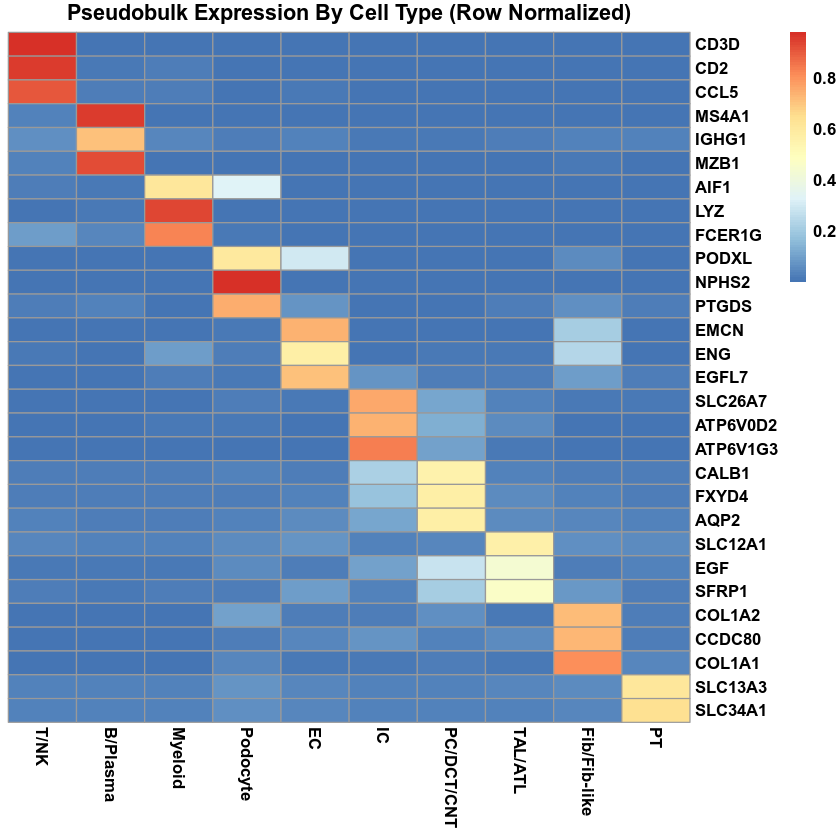

In [36]:
pheatmap(pb_props[match(markers, rownames(pb_props)), ] %>% na.omit(), 
         cluster_rows = F, cluster_cols = F,
         main = 'Pseudobulk Expression By Cell Type (Row Normalized)',
         fontsize = 10, fontface = 'bold')

In [ ]:
T_NK_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'T/NK', dataset == 'scRNAseq') %>% pull(cell)])
B_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'B/Plasma', dataset == 'scRNAseq') %>% pull(cell)])
Myeloid_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Myeloid', dataset == 'scRNAseq') %>% pull(cell)]) 
PT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PT', dataset == 'scRNAseq') %>% pull(cell)])
EC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'EC', dataset == 'scRNAseq') %>% pull(cell)])
TAL_ATL_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'TAL/ATL', dataset == 'scRNAseq') %>% pull(cell)])
Fib_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Fib/Fib-like', dataset == 'scRNAseq') %>% pull(cell)])
Pod_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Podocyte', dataset == 'scRNAseq') %>% pull(cell)])
PC_DCT_CNT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PC/DCT/CNT', dataset == 'scRNAseq') %>% pull(cell)])
IC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'IC', dataset == 'scRNAseq') %>% pull(cell)])

In [ ]:
pb <- as.matrix(data.frame(T_NK_pb, B_pb, Myeloid_pb, Pod_pb, EC_pb, IC_pb, PC_DCT_CNT_pb, TAL_ATL_pb, Fib_pb, PT_pb))

In [ ]:
pb_props <- prop.table(pb[rownames(pb) %in% markers, ], margin = 1)

In [ ]:
fig.size(6.5, 7)
pheatmap(pb_props[match(markers, rownames(pb_props)), ] %>% na.omit(), 
         cluster_rows = F, cluster_cols = F, fontsize = 20,
         main = 'scRNAseq',
         fontsize_row = 10, fontsize_col = 10, fontface = 'bold')

In [49]:
T_NK_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'T/NK', dataset == 'snRNAseq') %>% pull(cell)])
B_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'B/Plasma', dataset == 'snRNAseq') %>% pull(cell)])
Myeloid_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Myeloid', dataset == 'snRNAseq') %>% pull(cell)]) 
PT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PT', dataset == 'snRNAseq') %>% pull(cell)])
EC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'EC', dataset == 'snRNAseq') %>% pull(cell)])
TAL_ATL_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'TAL/ATL', dataset == 'snRNAseq') %>% pull(cell)])
Fib_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Fib/Fib-like', dataset == 'snRNAseq') %>% pull(cell)])
Pod_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'Podocyte', dataset == 'snRNAseq') %>% pull(cell)])
PC_DCT_CNT_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'PC/DCT/CNT', dataset == 'snRNAseq') %>% pull(cell)])
IC_pb <- rowMeans(norm[, all_meta %>% filter(broad.type == 'IC', dataset == 'snRNAseq') %>% pull(cell)])

In [50]:
pb <- as.matrix(data.frame(T_NK_pb, B_pb, Myeloid_pb, Pod_pb, EC_pb, IC_pb, PC_DCT_CNT_pb, TAL_ATL_pb, Fib_pb, PT_pb))

In [51]:
pb_props <- prop.table(pb[rownames(pb) %in% markers, ], margin = 1)

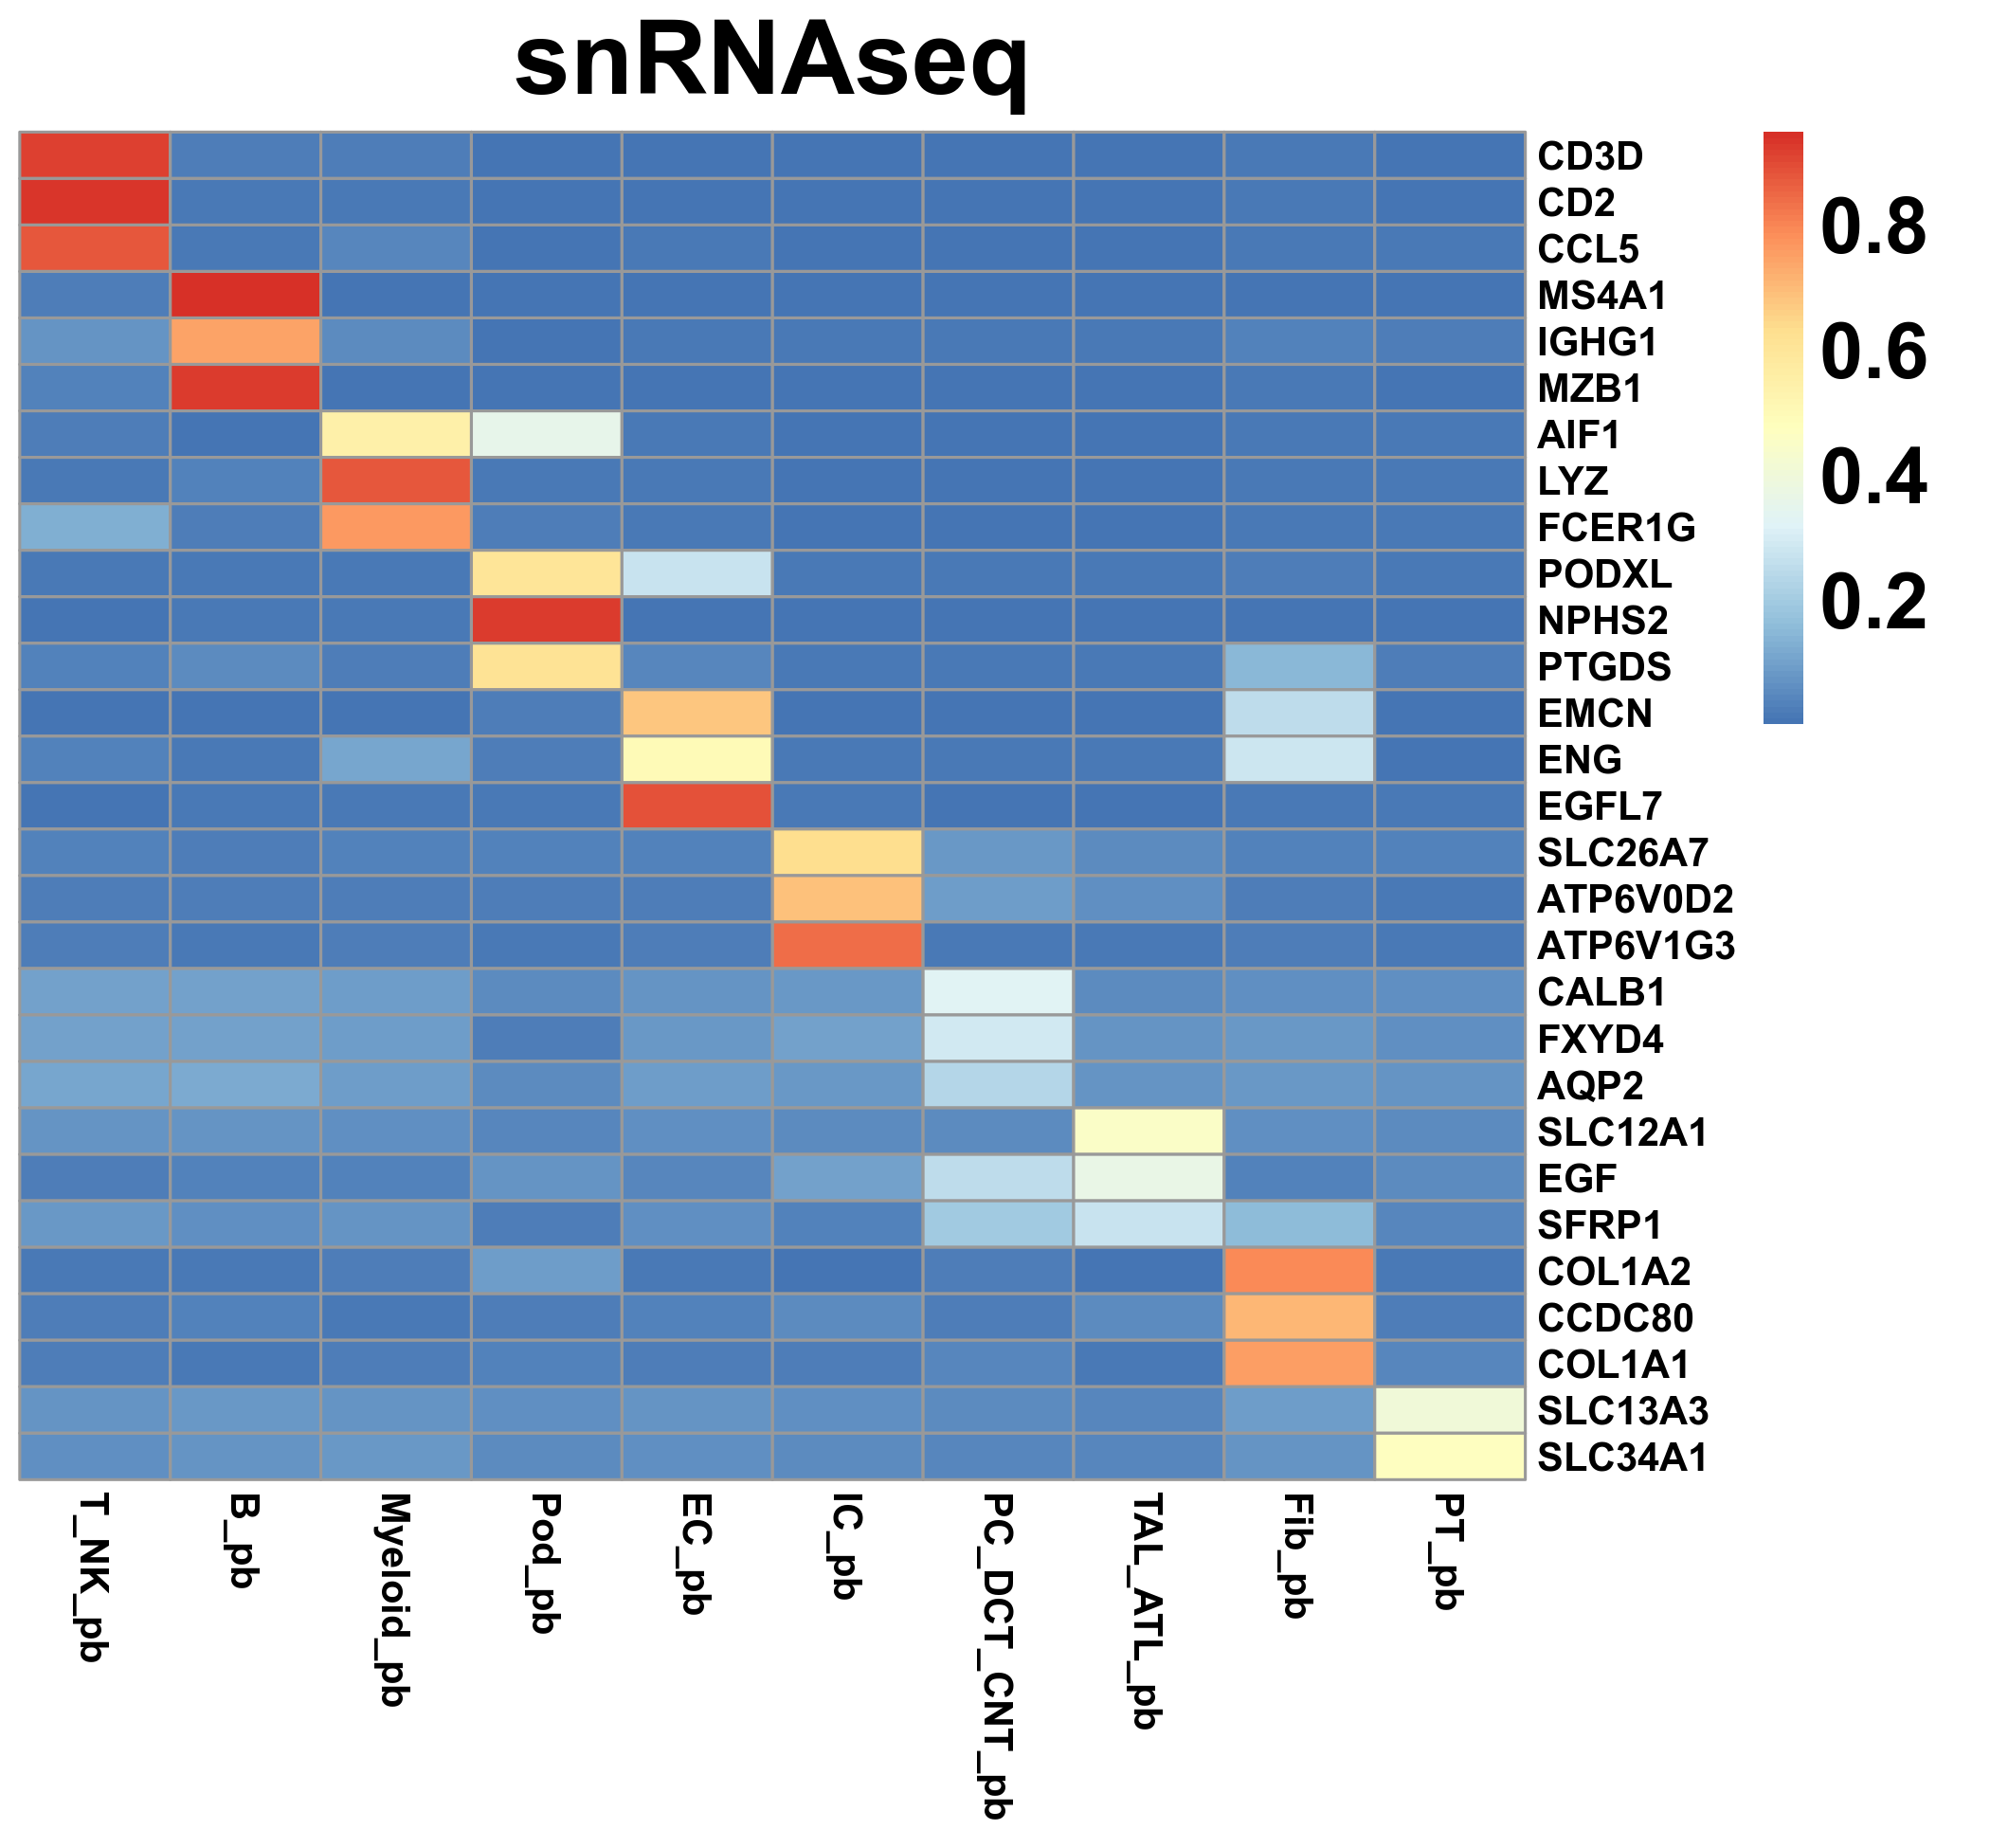

In [52]:
fig.size(6.5, 7)
pheatmap(pb_props[match(markers, rownames(pb_props)), ] %>% na.omit(), 
         cluster_rows = F, cluster_cols = F, fontsize = 20,
         main = 'snRNAseq',
         fontsize_row = 10, fontsize_col = 10, fontface = 'bold')

### DE Known Markers

In [9]:
markers <- c('CD3D', 'CD2', 'CCL5', 'MS4A1', 'IGHG1', 'MZB1', 'AIF1', 'LYZ', 'FCER1G', 'PODXL', 'NPHS2', 'PTGDS',
             'EMCN', 'ENG', 'EGFL7', 'SLC26A7', 'ATP6V0D2', 'ATP6V1G3', 'CALB1', 'FXYD4', 'AQP2', 'SLC12A1', 'EGF', 'SFRP1',
             'COL1A2', 'CCDC80', 'COL1A1', 'SLC13A3', 'FM01', 'SLC34A1')

In [ ]:
sc <- sc_wilcox %>% filter(feature %in% markers) %>% 
            select(feature, group, logFC) %>% 
            mutate(logFC = as.numeric(logFC)) %>% 
            pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()

In [ ]:
sn <- sn_wilcox %>% filter(feature %in% markers) %>% 
            select(feature, group, logFC) %>% 
            mutate(logFC = as.numeric(logFC)) %>% 
            pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()

In [ ]:
all <- all_wilcox %>% filter(feature %in% markers) %>% 
            select(feature, group, logFC) %>% 
            mutate(logFC = as.numeric(logFC)) %>% 
            pivot_wider(names_from = 'group', values_from = 'logFC') %>% data.frame()

In [ ]:
rownames(sc) <- sc[, 'feature']
sc <- sc[markers, - 1] %>% na.omit() %>% as.matrix()
sc <- sc[, c('T.NK', 'B.Plasma', 'Myeloid', 'Podocyte', 'EC', 'IC', 'PC.DCT.CNT', 'TAL.ATL', 'Fib.Fib.like', 'PT')]

In [ ]:
rownames(sn) <- sn[, 'feature']
sn <- sn[markers, - 1] %>% na.omit() %>% as.matrix()
sn <- sn[, c('T.NK', 'B.Plasma', 'Myeloid', 'Podocyte', 'EC', 'IC', 'PC.DCT.CNT', 'TAL.ATL', 'Fib.Fib.like', 'PT')]

In [ ]:
rownames(all) <- all[, 'feature']
all <- all[markers, - 1] %>% na.omit() %>% as.matrix()
all <- all[, c('T.NK', 'B.Plasma', 'Myeloid', 'Podocyte', 'EC', 'IC', 'PC.DCT.CNT', 'TAL.ATL', 'Fib.Fib.like', 'PT')]

In [ ]:
marker_annot <- data.frame(cell.type = c(rep('T/NK', 3), rep('B/Plasma', 3), rep('Myeloid', 3), rep('Podocyte', 3),
                             rep('EC', 3), rep('IC', 3), rep('PC/DCT/CNT', 3), rep('TAL/ATL', 3), rep('Fib/Fib-like', 3),
                             rep('PT', 3)))
rownames(marker_annot) <- markers

In [ ]:
pheatmap(sc, cluster_rows = F, cluster_cols = F,
         annotation_row = marker_annot, 
         legend_breaks = c( -1, 0, 1, 2, 3, max(sc)),
         legend_labels = c('-1', '0', '1', '2', '3', 'logFC\n'),
         main = 'scRNAseq',
         fontsize = 6.5, fontface = 'bold')

In [ ]:
pheatmap(sn, cluster_rows = F, cluster_cols = F,
         annotation_row = marker_annot, 
         legend_breaks = c( -1, 0, 1, 2, 3, max(sn)),
         legend_labels = c('-1', '0', '1', '2', '3', 'logFC\n'),
         main = 'snRNAseq',
         fontsize = 6.5, fontface = 'bold')

In [ ]:
pheatmap(all, cluster_rows = F, cluster_cols = F,
         annotation_row = marker_annot, 
         legend_breaks = c( -1, 0, 1, 2, 3, max(all)),
         legend_labels = c('-1', '0', '1', '2', '3', 'logFC\n'),
         main = 'Integrated Dataset Marker Gene Expression',
         fontsize = 6.5, fontface = 'bold')

### Marker Gene UMAPs

In [57]:
sn_umap <- umap[sn_meta$cell, c(1, 2)] %>% cbind(norm['SLC12A1', sn_meta$cell])
sc_umap <- umap[sc_meta$cell, c(1, 2)] %>% cbind(norm['SLC12A1', sc_meta$cell])

In [63]:
sc_umap <- sc_umap[idx, ]

In [64]:
colnames(sn_umap) <- c('UMAP1', 'UMAP2', 'SLC12A1')
colnames(sc_umap) <- c('UMAP1', 'UMAP2', 'SLC12A1') 

In [49]:
new_umap <- cbind(umap[, -3], norm['SLC13A3', ])

In [50]:
colnames(new_umap) <- c('UMAP1', 'UMAP2', 'SLC13A3')

In [51]:
new_umap <- new_umap %>% data.frame() %>% mutate(UMAP1 = as.numeric(UMAP1), UMAP2 = as.numeric(UMAP2),
                                SLC13A3 = as.numeric(SLC13A3))

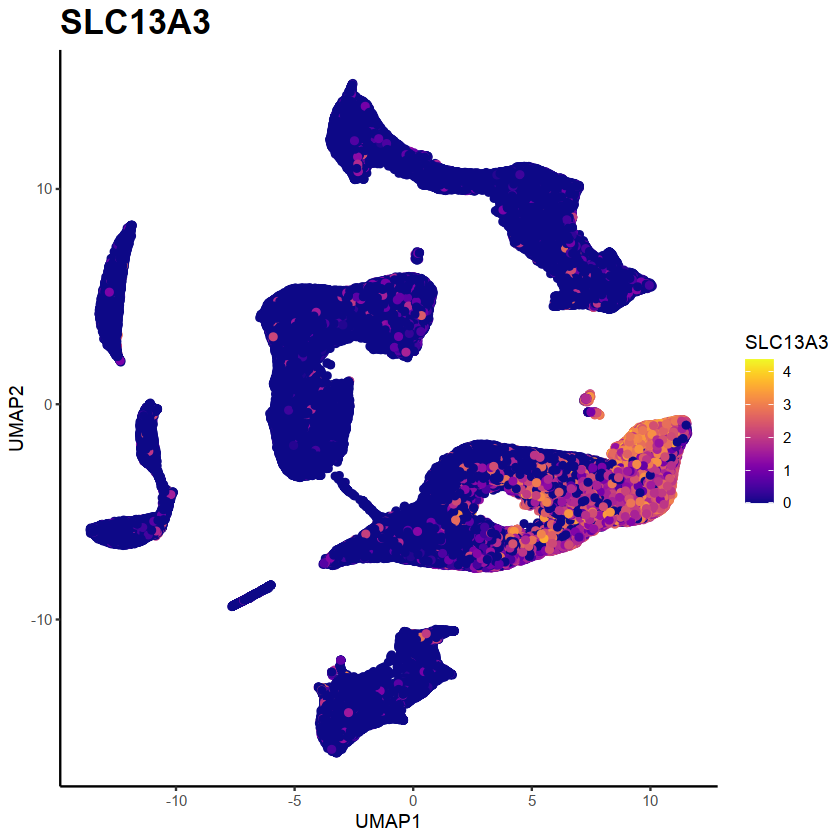

In [52]:
ggplot(new_umap[sample(nrow(new_umap)), ], aes(x = UMAP1, y = UMAP2, color = SLC13A3)) + 
    geom_point() + 
    theme_classic() + 
    scale_color_viridis(option = 'plasma') + 
    labs(x = 'UMAP1', y = 'UMAP2', title = 'SLC13A3') +
    theme(plot.title = element_text(size = 20, face = 'bold'))

In [110]:
sn_umap <- sn_umap %>% data.frame() %>% mutate(UMAP1 = as.numeric(UMAP1), UMAP2 = as.numeric(UMAP2), 
                                               SLC13A3 = as.numeric(SLC13A3))
sc_umap <- sc_umap %>% data.frame() %>% mutate(UMAP1 = as.numeric(UMAP1), UMAP2 = as.numeric(UMAP2), 
                                               SLC13A3 = as.numeric(SLC13A3))

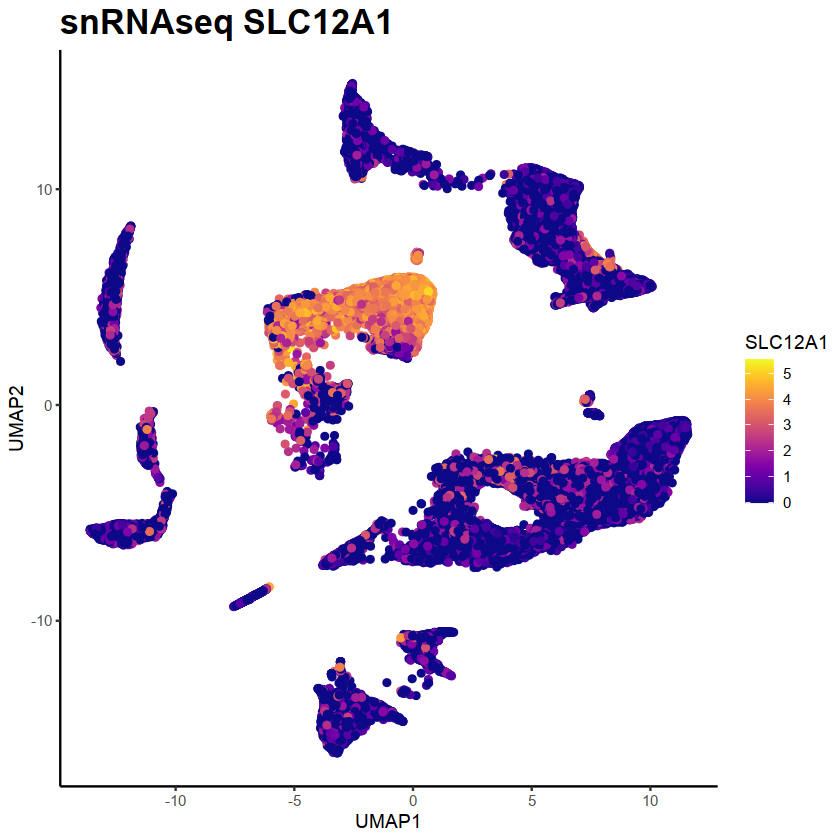

In [60]:
ggplot(sn_umap[sample(nrow(sn_umap)), ] %>% data.frame(), aes(x = UMAP1, y = UMAP2, color = SLC12A1)) + 
    geom_point() + 
    theme_classic() + 
    scale_color_viridis(option = 'plasma') + 
    labs(x = 'UMAP1', y = 'UMAP2', title = 'snRNAseq SLC12A1') +
    theme(plot.title = element_text(size = 20, face = 'bold'))

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'SLC1A3' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

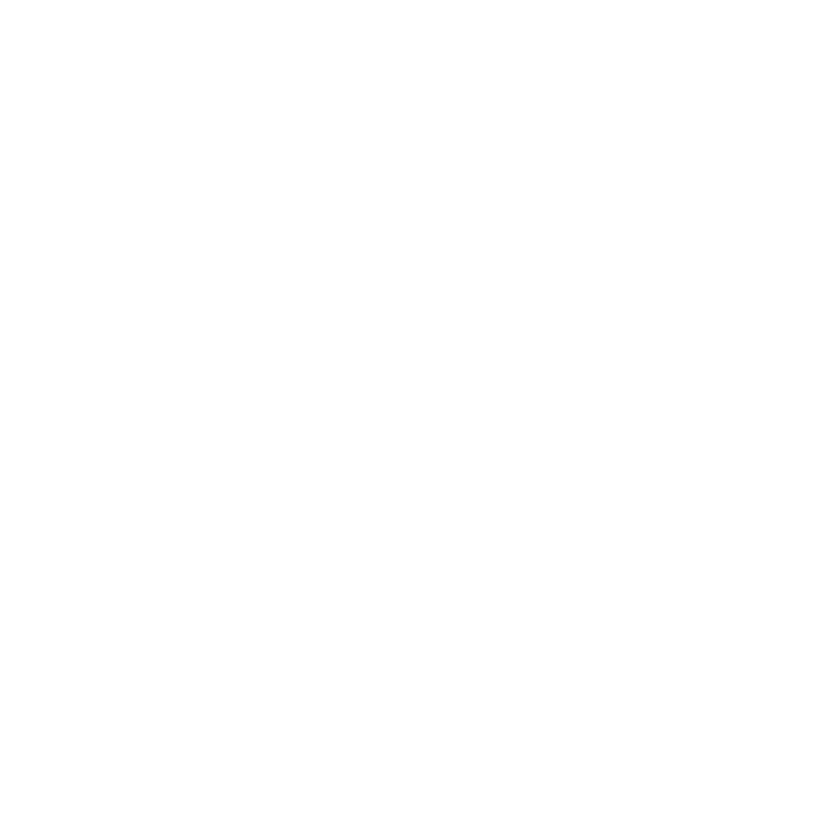

In [65]:
ggplot(sc_umap[sample(nrow(sc_umap)), ] %>% data.frame(), aes(x = UMAP1, y = UMAP2, color = SLC12A1)) + 
    geom_point() + 
    theme_classic() + 
    scale_color_viridis(option = 'plasma') + 
    labs(x = 'UMAP1', y = 'UMAP2', title = 'scRNAseq SLC12A3') + 
    theme(plot.title = element_text(size = 20, face = 'bold'))